# First Steps to OpenCV

Let's start with importing the essential libraries.

In [2]:
#%matplotlib inline 

# For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot
#import numpy as np # For all mathematical calculations
import cv2 as cv # For image base transformations
import matplotlib.pyplot as plt #For plotting the output
import numpy as np

# Opening and Diplaying Images

cv.imread function reads the image to an array. It takes two parameters. Image file direction and the reading mode(flag). 

## **Syntax: cv2.imread(path, flag)**

Parameters:
path: A string representing the path of the image to be read.
flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR

There are several image file reading modes. You can find them in [here](https://docs.opencv.org/master/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)


In the below code IMREAD_REDUCED_COLOR_2 is used.
If set, always convert image to the 3 channel BGR color image and the image size reduced 1/2.

cv.cvtColor is another important function. It Converts an image from one color space to another.

# cv.cvtColor
Converts an image from one color space to another.
There are actually 4 parameters to the code. But we only need 2 for the time being.
src - image source
flag - convertion mode

This convertion is often needed because of the difference between conventions. In default images are in BGR color space. But matplotlib use RGB as default color space. Imshow function will plot the image in RGB.

If we don't do this transform image will look different having odd colors.
You can find more about cvt.Color in [here](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html) 

# A quick intuition about matplotlib

matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:

You can learn any function in matplotlib.pyplot in [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

Let's focus on the functions used in below code:

## plt.figure

Create a new figure.

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)

In the below code only the figsize parameter is used. Everything else is used in default mode. Click [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure) to find everything about plt.figure function.

## plt.imshow
There are lot of parameters to this function. But the below code uses default values of them.

Mainly it Display data as an image, i.e., on a 2D regular raster.
Find the full documentation on imshow in [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)

## plt.title
Set a title for the axes.

matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)

label : Text to use for the title

fontdic : A dictionary controlling the appearance of the title text

loc : Which title to set.

pad : The offset of the title from the top of the axes, in points.

For a more details click [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title)

## plt.xticks/plt.yticks
xticks(ticks=None, labels=None, **kwargs)

Get or set the current tick locations and labels of the x-axis.
Pass no arguments to return the current values without modifying them.

For an example. If you want to name a certain point at x axis as "middle". Then you pass the x axis point as the first arguement(ticks)
And "middle" as the second arguement. Passing an empty list removes all xticks. This can be used to remove all ticks so we can only dsiplay the image.

[Full Documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xticks.html?highlight=xticks#matplotlib.pyplot.xticks)

### Let's load an image and plot it

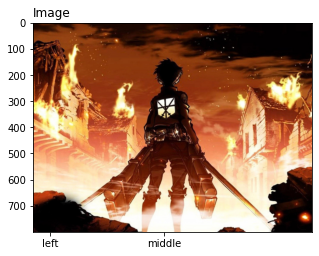

In [3]:
fn = './images/attack-on-titan.jpg'             #assigning the image file direction to a variable(RENAME THE FILENAME TO USE YOUR OWN IMAGES)
imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2) #reading the image as an array and storing into a variable. 
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB) 
plt.figure(figsize=(5,5)) #Creates a new figure
plt.imshow(imgo) # Displays the image
plt.title('Image',loc='left') #
plt.xticks([500,65],["middle","left"])
plt.show() # Displays the current figure

# Creating a Grayscale Image

232


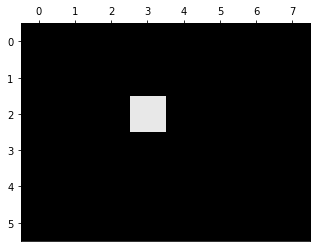

In [11]:
im = np.zeros((6,8),dtype=np.uint8)

im[2,3] = 1000 #assigning 300 for the 2,3 th pixel
print(im[2,3]) #printing the value of the pixel
fig, ax = plt.subplots() 
ax.imshow(im,cmap="gray",vmin=0,vmax=255)
ax.xaxis.tick_top() #moves the defualt ticks at the bottom of the picture to the top
plt.show() #display the image

## Let's analyse the above code

# im = np.zeros((6,8),dtype=np.uint8)

np.zeros function creates an array of zeros. Parameters are
1. shape : shape of the array
2. dtype : data type of the array(default is numpy.float64)

in the code a 2D array of shape 6x8 is used and the data type is unsigned integer  8 bit(uint8)

# pyplot.subplots

This creates a new figure and subplots.

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw) These are the parameters of the function. For now  three parameters are enough to control our codes.

nrows,ncols = Number of rows/columns of the subplot grid.
sharex, sharey = bool or {'none', 'all', 'row', 'col'}, default: False {Controls sharing of properties among x (sharex) or y (sharey) axes:}

[Full Documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)

In here imshow fuction is used in different manner than the previous code.
In here cmap parameter is passed.

cmapstr or Colormap, default: rcParams ("image.cmap"), (default: 'viridis')

The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data.

[All the color maps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

For black and white images "gray" is used

# Warning
There is small trick in the imhow that will keep you wandering in the internet for hours.
#  If you do not provide the vmin and vmax parameters, function will set the vmin as the minimum value in the array and vmax as the maximum value in the array.
## So as we have only provided two value to the array(0,n) it will set the vmax as the value we asigned to that particular pixel. So no matter what value you set it will display a white pixel without any intensity change.


# Another important point

im[2,3] = 1000
>>> 232

Observe this bizzare input and output. Images array is in uint8 data type. We know that it's maximum value is 255.
But I have assigned 1000 to it's (2,3) th pixel. But without giving error code worked.

And you can see when we print that pixel value it' giving 232.

If you give some random values to this bit and obesere you can see it for yourelf.

## What actually happened is, the remainder, when our value devided 256(n%256) is actually being assigned to the pixel

# Creating a Color Image

In [5]:
im = np.zeros((3,4, 3),dtype=np.uint8)

im[2,3,0] = 1000
print(im[2,3])
#print(im)
#fig, ax = plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top()
plt.show()

[232   0   0]


# Let's quickly go through the above code

In the first line we have created a 3 dimentional array. For example (2,2,3) creates a array like this

[[[0,0,0],[0,0,0]],
 [[0,0,0],[0,0,0]]]

This differs from the array above because now each pixel has 3 distinct value. They are Red,Green and Blue channels.

im[2,3,0] = 127

This line is used to assign 127 to the Red Channel(0) of the (2,3)th pixel.
As the other two channels are still 0, the (2,3)th pixel will take a red color

For more details about matplotlib subplots click [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)

# Displaying with OpencCV's HighGUI

HighGUI allows us to open windows, to display images, to read and write graphics-related files (both images and video), and to handle simple mouse, pointer, and keyboard events.

In [6]:
img = cv.imread('./images/katniss.jpg', cv.IMREAD_COLOR) #reads an image to an array
cv.namedWindow('Image', cv.WINDOW_NORMAL) #creates an window to display the image
cv.imshow('Image', img) #display the image
cv.waitKey(0) #stall instruction flow untill a key is pressed
cv.destroyAllWindows() #closes all the current windows open

# Increasing the Brightness

[[ 70  73  92 ...  76  74  86]
 [ 61  59  72 ...  78  80  63]
 [ 86  75  74 ...  64  73  62]
 ...
 [ 86  77  85 ...  31  60  88]
 [ 97  84  88 ...  29  43  49]
 [117  84  87 ...   5  17  13]]
uint8
[[170 173 192 ... 176 174 186]
 [161 159 172 ... 178 180 163]
 [186 175 174 ... 164 173 162]
 ...
 [186 177 185 ... 131 160 188]
 [197 184 188 ... 129 143 149]
 [217 184 187 ... 105 117 113]]
uint8
[[1070 1073 1092 ... 1076 1074 1086]
 [1061 1059 1072 ... 1078 1080 1063]
 [1086 1075 1074 ... 1064 1073 1062]
 ...
 [1086 1077 1085 ... 1031 1060 1088]
 [1097 1084 1088 ... 1029 1043 1049]
 [1117 1084 1087 ... 1005 1017 1013]]
uint16
[[170 173 192 ... 176 174 186]
 [161 159 172 ... 178 180 163]
 [186 175 174 ... 164 173 162]
 ...
 [186 177 185 ... 131 160 188]
 [197 184 188 ... 129 143 149]
 [217 184 187 ... 105 117 113]]
uint8


Text(0.5, 1.0, 'cv.add')

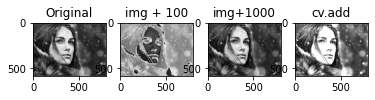

In [7]:
img = cv.imread('./images/keira.jpg', cv.IMREAD_GRAYSCALE) #use your own grayscale image here
img=np.array(img,dtype=np.uint8)
print(img)
print(img.dtype)

imgb = img + 100
print(imgb)
print(imgb.dtype)

imgd = img + 1000
#imgd=np.array(imgd,dtype=np.uint8)
print(imgd)
print(imgd.dtype)

imgc = cv.add(img, 100)
print(imgc)
print(imgc.dtype)

f, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(imgb, cmap="gray")
ax[1].set_title('img + 100')
ax[2].imshow(imgd, cmap="gray")
ax[2].set_title('img+1000')
ax[3].imshow(imgc, cmap="gray")
ax[3].set_title('cv.add')

# Another important point

To increase the brightness of the image main two methods are used.

1. Using cv.add function

2. Adding the increasing value to the whole image array manually

## You can see that the image we increased brightness manually has being distorted. Reason is when we add a certain value some of the pixels might go beyond 255. As this is a unit8 image(default data type), the actual number which will be assigned will be the remainder of that value, just like when we were creating the grayscale image.
## But this explanation is only valid as far as the value we are adding is also a uint8 number.

## As you can see in the img+1000, it hasn't distorted like the img+100. If we obsereve the image array the values have gone beyond 255 and data type of the image has changed to uint16.

## Reason for this bizzare behaviour is, 1000 is not a uint8 number. It' actually unit16 number. So the whole array changed it's dtype to accomedate the new values.

### imgd=np.array(imgd,dtype=np.uint8)

Try commenting and uncommenting this particular line. It will change the dtype of the array between uint8 and uint16. Observe the changes.

Yet the uint16 doesn't show major differences. We will dive into this matter in future tutorials.

# cv.add

When we are using the cv.add funtion it increase the brightness smoothly. Reason is 

it outputs

(n = pixel value + our input)

n {n<255}

255 {n>255}

So this prevents accidental dark pixels.

# Zeroing-Out the Green and Blue Planes

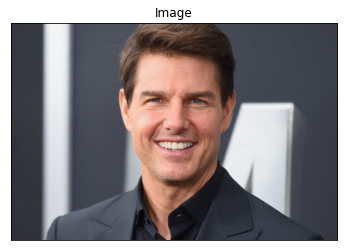

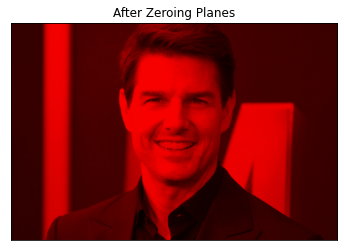

In [8]:
img = cv.imread('./images/tom.jpg', cv.IMREAD_COLOR) #use your own RGB image here
if img is None:
    print('Image could not be read.')
    assert False
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()
img[:,:,1:3] = 0
plt.imshow(img)
plt.title('After Zeroing Planes')
plt.xticks([]), plt.yticks([])
plt.show()

The only important part of the above code is this particular line

img[:,:,1:3] = 0

As we learned earlier. Color images has a 3 dimentional array.

In this line firt we choose all the rows by the first " : "

then all the rows are chosen by the second " : "

In a 3 dimentional array, each pixel has an array of lenght 3. First number for Red channel and next two for Gren and Blue channels respectively.

What happened here is we assigned 0 for the second and third element of each pixel. So the only channel standing is red. So we can see a red image.

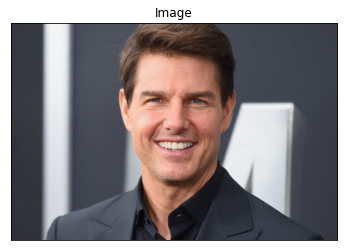

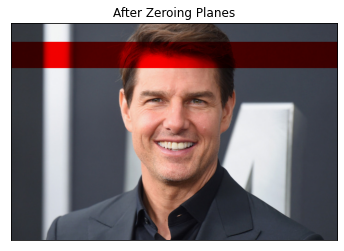

In [9]:
img = cv.imread('./images/tom.jpg', cv.IMREAD_COLOR)
if img is None:
    print('Image could not be read.')
    assert False
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()
img[43:100,:,1:3] = 0
plt.imshow(img)
plt.title('After Zeroing Planes')
plt.xticks([]), plt.yticks([])
plt.show()

You can see that by selecting a particular range of rows, we can red only a stripe of the image.